In [ ]:
import pandas as pd
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
import string
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')"""

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
data = pd.read_csv('/content/final .csv')
display(data.head())

,text,main_label,sub_label
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative
1,१२ भाइ,non-hate,neutral
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing


In [ ]:
print('Confirming the data currently in use:')
display(data.head())

Confirming the data currently in use:


,text,main_label,sub_label
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative
1,१२ भाइ,non-hate,neutral
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing


In [ ]:
print('Confirming the data currently in use:')
display(data.head())

Confirming the data currently in use:


,text,main_label,sub_label
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative
1,१२ भाइ,non-hate,neutral
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing


In [ ]:
# Check unique values and their counts for 'main_label'
display(data['main_label'].value_counts())

,count
main_label,
hate,11420
non-hate,10575


In [ ]:
display(data['sub_label'].value_counts())

,count
sub_label,
mocking,5262
neutral,5017
dehumanizing,3514
miscellaneous,2969
blaming,1856
supportive,1821
informative,1556


In [ ]:
# Required libraries
!pip install pandas indic-transliteration tqdm --quiet

import pandas as pd
from tqdm import tqdm
from indic_transliteration import sanscript
from indic_transliteration.sanscript import transliterate

In [ ]:
# ----------------------------
# Roman Nepali -> Devanagari function
# ----------------------------
def roman_to_nepali(text):
    try:
        return transliterate(str(text), sanscript.ITRANS, sanscript.DEVANAGARI)
    except:
        return text

# ----------------------------
# Apply translation
# ----------------------------
tqdm.pandas(desc="Translating Roman Nepali")
data['translated'] = data['text'].progress_apply(roman_to_nepali)

# ----------------------------
# Save new CSV
# ----------------------------
data.to_csv("final_transliterated_data.csv", index=False)
print("Roman Nepali → Devanagari translation complete!")

Translating Roman Nepali: 100%|██████████| 21995/21995 [00:05<00:00, 4024.42it/s]


Roman Nepali → Devanagari translation complete!


In [ ]:
data = pd.read_csv('/content/final_transliterated_data.csv')
display(data.head())

,text,main_label,sub_label,translated
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...
1,१२ भाइ,non-hate,neutral,१२ भाइ
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,..."
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing,यो चिक्नेको नि दिन गयो जस्तो एक्सए
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...


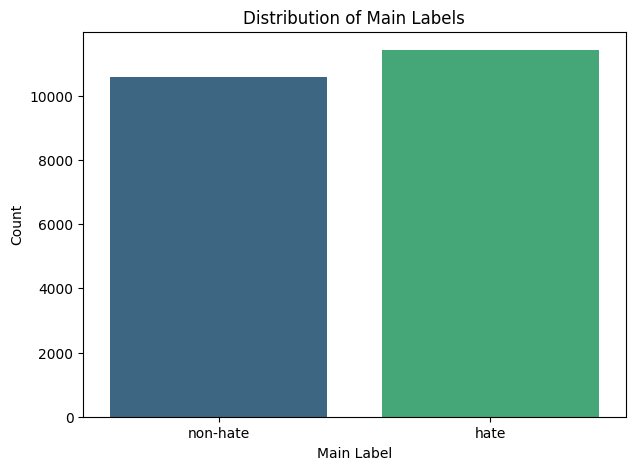

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(7, 5))
sns.countplot(data=data, x='main_label', hue='main_label', palette='viridis', legend=False)
plt.title('Distribution of Main Labels')
plt.xlabel('Main Label')
plt.ylabel('Count')
plt.show()

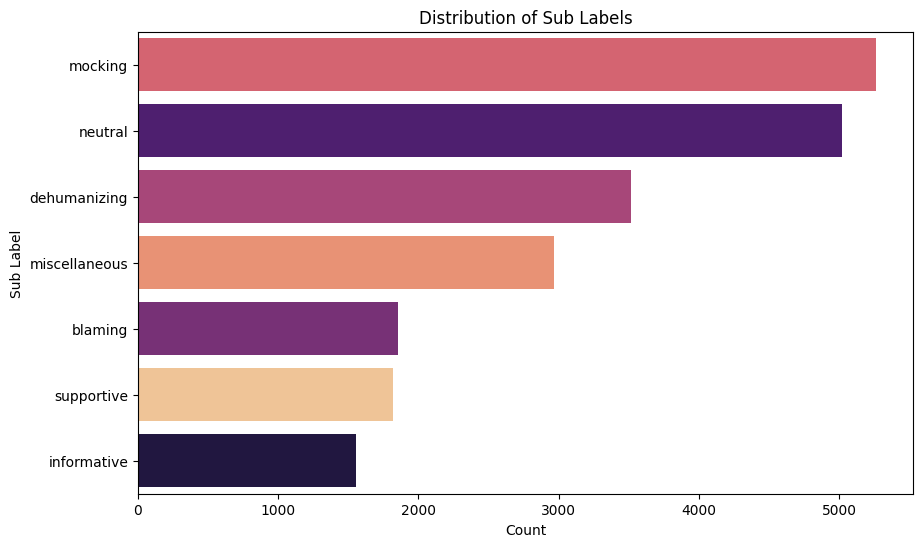

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='sub_label', hue='sub_label', order=data['sub_label'].value_counts().index, palette='magma', legend=False)
plt.title('Distribution of Sub Labels')
plt.xlabel('Count')
plt.ylabel('Sub Label')
plt.show()

In [ ]:
import re
import string
import pandas as pd

def wordopt(translated):
    if pd.isna(translated):
        return ""

    translated = str(translated)

    # 1. Remove Emojis and Symbols (including black hearts ❤ and others)
    # This regex removes:
    # \U00010000-\U0010ffff : High-range emojis (faces, flags)
    # \u2000-\u2bff         : Symbols, arrows, and hearts (like the black heart)
    translated = re.sub(r'[\U00010000-\U0010ffff\u2000-\u2bff]', '', translated)

    # 2. Convert to lowercase
    translated = translated.lower()

    # 3. Remove square brackets and their contents
    translated = re.sub(r'\[.*?\]', '', translated)

    # 4. Remove URLs
    translated = re.sub(r'https?://\S+|www\.\S+', '', translated)

    # 5. Remove HTML tags
    translated = re.sub(r'<.*?>', '', translated)

    # 6. Remove punctuation (ASCII and Nepali danda)
    translated = re.sub(f'[{re.escape(string.punctuation)}\u0964]', '', translated)

    # 7. Remove digits
    translated = re.sub(r'\d+', '', translated)

    # 8. Remove English text (lowercase and uppercase alphabets)
    translated = re.sub(r'[a-zA-Z]', '',translated)

    # 9. Remove extra whitespace
    translated = re.sub(r'\s+', ' ', translated).strip()

    return translated

In [ ]:
data['cleaned_text'] = data['translated'].apply(wordopt)
display(data.head(5))

,text,main_label,sub_label,translated,cleaned_text
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,यो वैदेशिक हस्तक्षेप हो अब झन छोड्नु हुन्न सिर...
1,१२ भाइ,non-hate,neutral,१२ भाइ,भाइ
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो त...
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing,यो चिक्नेको नि दिन गयो जस्तो एक्सए,यो चिक्नेको नि दिन गयो जस्तो एक्सए
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...


In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
data['tokens1'] = data['cleaned_text'].apply(word_tokenize)
data.head()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,text,main_label,sub_label,translated,cleaned_text,tokens1
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,यो वैदेशिक हस्तक्षेप हो अब झन छोड्नु हुन्न सिर...,"[यो, वैदेशिक, हस्तक्षेप, हो, अब, झन, छोड्नु, ह..."
1,१२ भाइ,non-hate,neutral,१२ भाइ,भाइ,[भाइ]
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो त...,"[जनतालाई, उलु, बनाउने, गुरू, पार्टी, त, एमाले,..."
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing,यो चिक्नेको नि दिन गयो जस्तो एक्सए,यो चिक्नेको नि दिन गयो जस्तो एक्सए,"[यो, चिक्नेको, नि, दिन, गयो, जस्तो, एक्सए]"
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,"[मुजी, लाडो, कहा, मुजी, पिटे, तारो, लाडो, मुजी..."


In [ ]:
stopwords_file_path = "/content/stopwords.txt"

# Load the stopwords into a list or set
with open(stopwords_file_path, 'r', encoding='utf-8') as file:
    nepali_stopwords = {line.strip() for line in file}

# Check the stopwords
print(f"Loaded {len(nepali_stopwords)} Nepali stopwords.")
print(nepali_stopwords)

Loaded 851 Nepali stopwords.
{'', 'लागेको', 'तल', 'वटा', 'छू', 'निकै', 'पहिले', 'उनीहर', 'त्यही', 'तिनीहरूले', 'आदिलाई', 'शाय', 'अन्तर्गत', 'गैर', 'त्यहीँ', 'गर्नेछौ', 'सम्म', 'भएक', 'थियो', 'गर्दै', 'जुन', 'तिनीहर', 'कसैले', 'भयेन', 'सम्', 'कसै', 'होइनन्', 'लाई', 'कसैको', 'कुनै', 'आफै', 'यी', 'यति', 'राम्र', 'चाहेर', 'प्लस', 'पहिलो', 'गर्ने', 'छन', 'राख', 'अक्सर', 'छिन्', 'चाहन्छ', 'यसैले', 'तिनिहरुला', 'भएन', 'तेस्कार', 'होल', 'यहा', 'कसैलाई', 'मात्रै', 'तपाइँक', 'आफनो', 'मलाई', 'तिनीहरूलाई', 'हाम्रो', 'माथि', 'शायद', 'दिनुभएक', 'उहाँलाई', 'कहा', 'तिनीहरुको', 'तिनै', 'त्यसै', 'व', 'अन्तर्ग', 'पर्दैन', 'चाहनुहुन्', 'बाहे', 'लाख', 'जहा', 'रहेका', 'गर्दछ', 'अरूला', 'हुन्', 'तर', 'आएका', 'सध', 'कहाँबाट', 'मैल', 'आजक', 'जसमा', 'र', 'देख्', 'दिन्छ', 'अरुलाई', 'विशे', 'हुनुहुन्', 'गै', 'बाह्र', 'साँच्चै', 'त्यसैल', 'मुनि', 'केह', 'कहीं', 'यसर', 'नगर्नू', 'नभनेर', 'त्यसमा', 'अझै', 'अरूलाई', 'त्यत्तिकै', 'उप', 'होस्', 'रहँदै', 'भित्री', 'हो', 'त्यसपछ', 'वाट', 'धौ', 'मध्य', 'सात', 'भएँ', 'प्ल'

In [ ]:
def remove_stopwords_nepali(tokens, stopwords):

    filtered_tokens = []

    for token in tokens:
        original_token = token
        token_modified = False

        # Check for full word matches and suffixes
        for stopword in stopwords:
            if token == stopword:  # Remove stopword if it's a full word
                token = ""
                token_modified = True
                break  # No need to check further stopwords if one has been removed

            elif token.endswith(stopword):  # Check if stopword is a suffix
                remaining_token = token[:-len(stopword)].strip()
                if remaining_token:  # Only modify if the remaining token is valid
                    token = remaining_token
                    token_modified = True
                    break  # No need to check further stopwords if one has been removed

        # Add only non-empty tokens and those that are meaningfully modified
        if token and (not token_modified or token != original_token):
            filtered_tokens.append(token)

    return filtered_tokens

data['stop_words'] = data['tokens1'].apply(lambda x: remove_stopwords_nepali(x, nepali_stopwords))
display(data.head())

,text,main_label,sub_label,translated,cleaned_text,tokens1,stop_words
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,यो वैदेशिक हस्तक्षेप हो अब झन छोड्नु हुन्न सिर...,"[यो, वैदेशिक, हस्तक्षेप, हो, अब, झन, छोड्नु, ह...","[वैदेशि, हस्तक्षेप, झ, छोड्नु, हुन्, सिरोहियालाइ]"
1,१२ भाइ,non-hate,neutral,१२ भाइ,भाइ,[भाइ],[भाइ]
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो त...,"[जनतालाई, उलु, बनाउने, गुरू, पार्टी, त, एमाले,...","[जनता, उलु, बनाउने, गु, पार्टी, एमा, प्रू, भइसके]"
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing,यो चिक्नेको नि दिन गयो जस्तो एक्सए,यो चिक्नेको नि दिन गयो जस्तो एक्सए,"[यो, चिक्नेको, नि, दिन, गयो, जस्तो, एक्सए]","[चिक्ने, ग, एक्स]"
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,"[मुजी, लाडो, कहा, मुजी, पिटे, तारो, लाडो, मुजी...","[मुजी, लाडो, मुजी, पिटे, तारो, लाडो, मुजी, का,..."


In [ ]:
def custom_stem(word):
    suffixes = [
         'लाई','बाट','ता','ले','बाट', 'बाहेक', 'बाहिर', 'बाहिरपट्टी', 'भित्र', 'का', 'करिब', 'को', 'छ', 'छिन्',
        'जोड', 'ते', 'लागि', 'लाई', 'माथि', 'मन्तिर', 'मा', 'नजिक', 'पछाडि', 'पहिला', 'पारि',
        'प्रति', 'र', 'संग', 'सहित', 'तल','हरु','तर', 'तिर', 'तर्फ', 'उपर', 'विपरित', 'वरिपरि', 'बिचमा'
    ]
    for suffix in suffixes:
        if word.endswith(suffix):
            return word[:-len(suffix)]
    return word

# Apply stemming to each text (list of tokens)
def stem_words(tokens):
    return [custom_stem(word) for word in tokens]

# Apply stemming to 'tokens_cleaned' column and store in 'stemmed_tokens' column
data['stemmed_tokens'] = data['stop_words'].apply(stem_words)

display(data.head(10))

,text,main_label,sub_label,translated,cleaned_text,tokens1,stop_words,stemmed_tokens
0,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,non-hate,informative,यो वैदेशिक हस्तक्षेप हो । अब झन छोड्नु हुन्न स...,यो वैदेशिक हस्तक्षेप हो अब झन छोड्नु हुन्न सिर...,"[यो, वैदेशिक, हस्तक्षेप, हो, अब, झन, छोड्नु, ह...","[वैदेशि, हस्तक्षेप, झ, छोड्नु, हुन्, सिरोहियालाइ]","[वैदेशि, हस्तक्षेप, झ, छोड्नु, हुन्, सिरोहियालाइ]"
1,१२ भाइ,non-hate,neutral,१२ भाइ,भाइ,[भाइ],[भाइ],[भाइ]
2,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",hate,blaming,"“जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो,...",जनतालाई उलु बनाउने गुरू पार्टी त एमाले नै हो त...,"[जनतालाई, उलु, बनाउने, गुरू, पार्टी, त, एमाले,...","[जनता, उलु, बनाउने, गु, पार्टी, एमा, प्रू, भइसके]","[जन, उलु, बनाउने, गु, पार्टी, ए, प्रू, भइसके]"
3,यो चिक्नेको नि दिन गयो जस्तो एक्सए,hate,dehumanizing,यो चिक्नेको नि दिन गयो जस्तो एक्सए,यो चिक्नेको नि दिन गयो जस्तो एक्सए,"[यो, चिक्नेको, नि, दिन, गयो, जस्तो, एक्सए]","[चिक्ने, ग, एक्स]","[चिक्ने, ग, एक्स]"
4,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,hate,dehumanizing,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,मुजी लाडो कहा मुजी पिटे तारो लाडो मुजी काह भिट...,"[मुजी, लाडो, कहा, मुजी, पिटे, तारो, लाडो, मुजी...","[मुजी, लाडो, मुजी, पिटे, तारो, लाडो, मुजी, का,...","[मुजी, लाडो, मुजी, पिटे, तारो, लाडो, मुजी, , भ..."
5,हाहाहाहा,hate,mocking,हाहाहाहा,हाहाहाहा,[हाहाहाहा],[हाहाहाहा],[हाहाहाहा]
6,सुपर,non-hate,miscellaneous,सुपर,सुपर,[सुपर],[सुप],[सुप]
7,वी१० वाई मोज गर,non-hate,supportive,वी१० वाई मोज गर,वी वाई मोज गर,"[वी, वाई, मोज, गर]","[वी, वाई, मो, ग]","[वी, वाई, मो, ग]"
8,बुढा विल बे ग्रेट👏👏👏👏👏,non-hate,neutral,बुढा विल बे ग्रेट👏👏👏👏👏,बुढा विल बे ग्रेट,"[बुढा, विल, बे, ग्रेट]","[बुढा, वि, बे, ग्रेट]","[बुढा, वि, बे, ग्रेट]"
9,सुन्दर जोडी हजुरहरूको ।,non-hate,neutral,सुन्दर जोडी हजुरहरूको ।,सुन्दर जोडी हजुरहरूको,"[सुन्दर, जोडी, हजुरहरूको]","[सुन्द, जोडी, हजुरहरू]","[सुन्द, जोडी, हजुरहरू]"


In [ ]:
font_path = None
# Common font names for Devanagari
possible_font_names = [
    'NotoSansDevanagari-Regular.ttf',
    'Lohit-Devanagari.ttf',
    'DevanagariMT.ttf' # MacOS font
]

for font_name in possible_font_names:
    result = !find /usr/share/fonts -name "$font_name" 2>/dev/null
    if result:
        font_path = result[0]
        break

if font_path:
    print(f"Found Devanagari font at: {font_path}")
else:
    print("Could not find a suitable Devanagari font. Please ensure 'fonts-indic' is installed or specify your own font path.")
    # Fallback to a generic font if no Devanagari font is found, or set to None to let WordCloud use its default
    # For now, we'll keep it None and rely on the user to provide if this fails.

# Assign to path_to_font for use in the next cell
path_to_font = font_path

Could not find a suitable Devanagari font. Please ensure 'fonts-indic' is installed or specify your own font path.


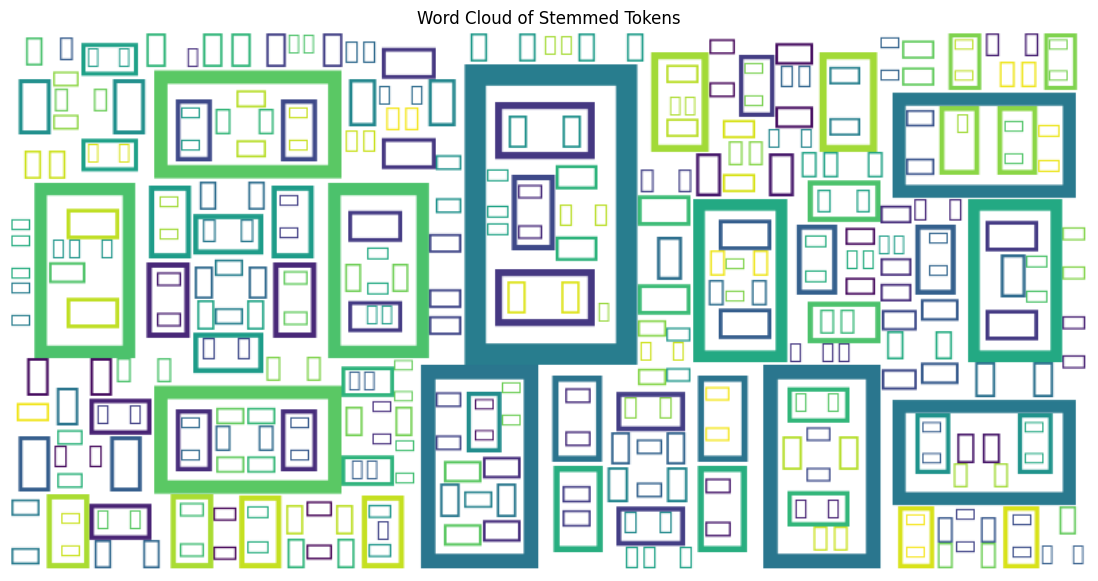

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the stemmed tokens into a single string
all_words = ' '.join([word for tokens_list in data['stemmed_tokens'] for word in tokens_list])

# Generate word cloud, using the detected font path
# If path_to_font is None, WordCloud will use its default mechanism, which might still not render Devanagari.
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=path_to_font).generate(all_words)

# Display the generated image:
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Stemmed Tokens')
plt.show()

In [ ]:
'''y_main = data['main_label']
y_sub = data['sub_label']

# Simple random split without filtering or stratification
X_train, X_test, y_main_train, y_main_test, y_sub_train, y_sub_test = train_test_split(
    X_tfidf,
    y_main,
    y_sub,
    test_size=0.30,
    random_state=42
)'''

"y_main = data['main_label']\ny_sub = data['sub_label']\n\n# Simple random split without filtering or stratification\nX_train, X_test, y_main_train, y_main_test, y_sub_train, y_sub_test = train_test_split(\n    X_tfidf,\n    y_main,\n    y_sub,\n    test_size=0.30,\n    random_state=42\n)"

### here we did the importance partsas we know tokenizer is the first step it builds a dictionary where every unique word gets a unique integer jastai dibas='5' cha vane shiva='12'.Also the bilstms need finitely long segments in our case some sentence is 3 words long or 100 words long so padding insure that it is exactly 50 number long

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# 1. Tokenize the text
max_words = 10000  # Only keep the top 10k most frequent words
max_len = 50       # Cut off sentences after 50 words
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")#yesma if nadkeho word haru aayo vane it will replaces it with this specian token
tokenizer.fit_on_texts(data['stemmed_tokens']) # Use 'cleaned_text' column

# 2. Convert text to sequences and pad them
sequences = tokenizer.texts_to_sequences(data['stemmed_tokens'])
X_padded = pad_sequences(sequences, maxlen=max_len, padding='post')

# 3. Encode the Sub Labels (Intents) into numbers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(data['sub_label'])
y_categorical = tf.keras.utils.to_categorical(y_encoded) # One-hot encoding

# 4. Split the data (using a simple 70/30 split as requested earlier)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_categorical, test_size=0.3, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# Configuration based on your data
vocab_size = 10000
max_length = 50    # Adjust based on your average sentence length
num_classes = 7      # Based on your image: mocking, neutral, dehumanizing, etc.

model = Sequential([
    # Input shape is required to "build" the params
    Embedding(input_dim=vocab_size, output_dim=128, input_length=max_length),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# This will now show the actual parameter counts instead of 'unbuilt'
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# This callback will stop training if the model stops improving, saving you time
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training - this is where the "unbuilt" params will finally be calculated
history = model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop]
)

Epoch 1/15
482/482 ━━━━━━━━━━━━━━━━━━━━ 18s 27ms/step - accuracy: 0.2892 - loss: 1.7568 - val_accuracy: 0.4734 - val_loss: 1.3967
Epoch 2/15
482/482 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.5736 - loss: 1.1819 - val_accuracy: 0.5137 - val_loss: 1.3264
Epoch 3/15
482/482 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7195 - loss: 0.8212 - val_accuracy: 0.5140 - val_loss: 1.4199
Epoch 4/15
482/482 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7975 - loss: 0.6072 - val_accuracy: 0.5045 - val_loss: 1.5947
Epoch 5/15
482/482 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.8378 - loss: 0.4945 - val_accuracy: 0.5014 - val_loss: 1.7808


482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


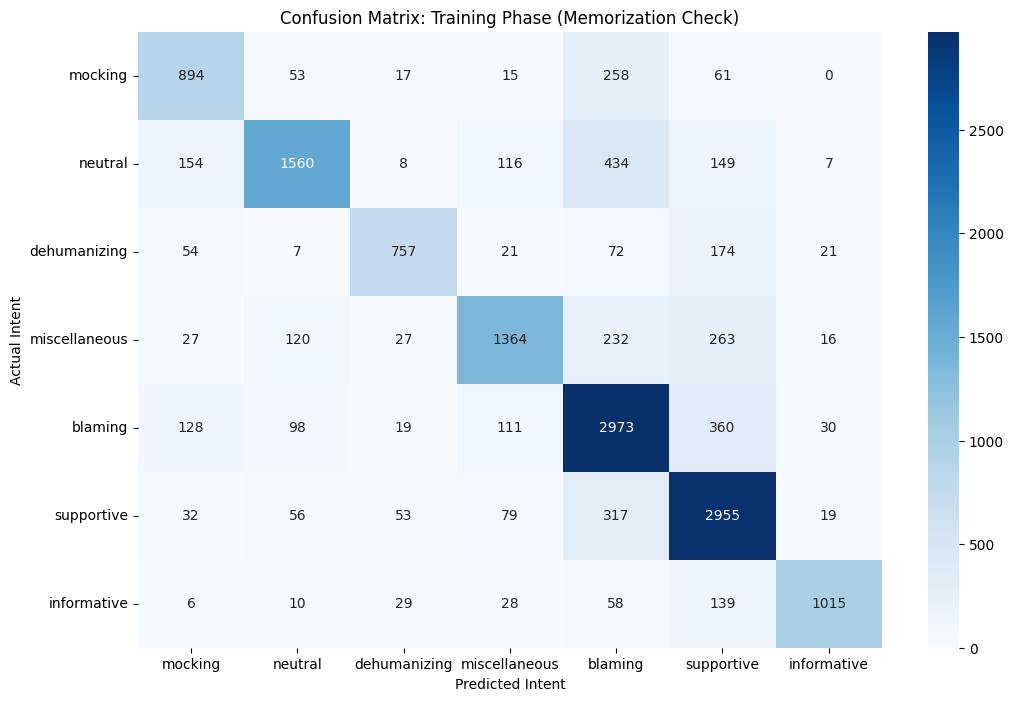

<class 'keras.src.models.sequential.Sequential'>


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Define target_names here before it's used
target_names = ['mocking', 'neutral', 'dehumanizing', 'miscellaneous', 'blaming', 'supportive', 'informative']

# 1. Get predictions for the TRAINING data
y_train_pred_probs = model.predict(X_train)
y_train_pred = np.argmax(y_train_pred_probs, axis=1)

# 2. Convert one-hot encoded y_train back to integers
y_train_true = np.argmax(y_train, axis=1)

# 3. Create the confusion matrix
cm_train = confusion_matrix(y_train_true, y_train_pred)

# 4. Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names,
            yticklabels=target_names)

plt.title('Confusion Matrix: Training Phase (Memorization Check)')
plt.xlabel('Predicted Intent')
plt.ylabel('Actual Intent')
plt.show()
print(type(model))

In [ ]:
from sklearn.metrics import classification_report

# Since you already have y_train_true and y_train_pred from your code:
print("BiLSTM Training Classification Report (Memorization Check):")
print(classification_report(y_train_true, y_train_pred, target_names=target_names))

BiLSTM Training Classification Report (Memorization Check):
               precision    recall  f1-score   support

      mocking       0.69      0.69      0.69      1298
      neutral       0.82      0.64      0.72      2428
 dehumanizing       0.83      0.68      0.75      1106
miscellaneous       0.79      0.67      0.72      2049
      blaming       0.68      0.80      0.74      3719
   supportive       0.72      0.84      0.78      3511
  informative       0.92      0.79      0.85      1285

     accuracy                           0.75     15396
    macro avg       0.78      0.73      0.75     15396
 weighted avg       0.76      0.75      0.75     15396



In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 50, 128)        │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,162,583 (15.88 MB)

 Trainable params: 1,387,527 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,775,056 (10.59 MB)

In [ ]:
print(model.layers[1].forward_layer)

<LSTM name=forward_lstm_2, built=True>


207/207 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


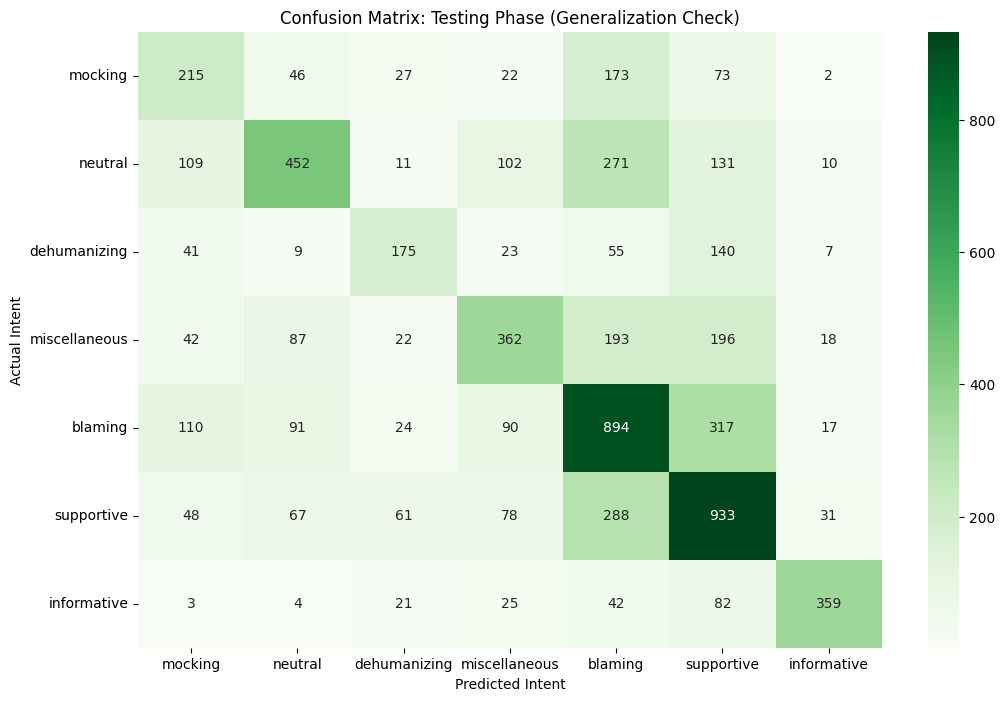

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Get predictions for the TESTING data (X_test)
# This uses data the model has NEVER seen during training
y_test_pred_probs = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# 2. Convert one-hot encoded y_test back to integers
y_test_true = np.argmax(y_test, axis=1)

# 3. Create the confusion matrix for Testing
cm_test = confusion_matrix(y_test_true, y_test_pred)

# 4. Plot using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens', # Changed color to Green for Testing
            xticklabels=target_names,
            yticklabels=target_names)

plt.title('Confusion Matrix: Testing Phase (Generalization Check)')
plt.xlabel('Predicted Intent')
plt.ylabel('Actual Intent')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# Ensure you have target_names defined as before
target_names = ['mocking', 'neutral', 'dehumanizing', 'miscellaneous', 'blaming', 'supportive', 'informative']

print("\n Bi-LSTM Intent Classification Report (Testing Phase):")
print(classification_report(y_test_true, y_test_pred, target_names=target_names))


 Bi-LSTM Intent Classification Report (Testing Phase):
               precision    recall  f1-score   support

      mocking       0.38      0.39      0.38       558
      neutral       0.60      0.42      0.49      1086
 dehumanizing       0.51      0.39      0.44       450
miscellaneous       0.52      0.39      0.45       920
      blaming       0.47      0.58      0.52      1543
   supportive       0.50      0.62      0.55      1506
  informative       0.81      0.67      0.73       536

     accuracy                           0.51      6599
    macro avg       0.54      0.49      0.51      6599
 weighted avg       0.53      0.51      0.51      6599

